### Linear SVM

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris["data"][:,(2,3)] #petal length and widht
y = (iris["target"] == 2).astype(np.float64) #Iris Virginica

In [4]:
X.shape,y.shape

((150, 2), (150,))

In [5]:
svm_clf = Pipeline([("scaler",StandardScaler()),
                   ("linear_svc",LinearSVC(C=1,loss="hinge")),])

In [6]:
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [7]:
svm_clf.predict([[5.5,1.7]])

array([1.])

#### Non Linear SVM Classification

In [33]:
def make_meshgrid(x,y,h=0.01):
    x_min,x_max = x.min()-1,x.max()+1
    y_min,y_max = y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    return xx,yy

In [9]:
def plot_contours(ax,clf,xx,yy,**params):
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx,yy,Z,**params)
    return out

No handles with labels found to put in legend.


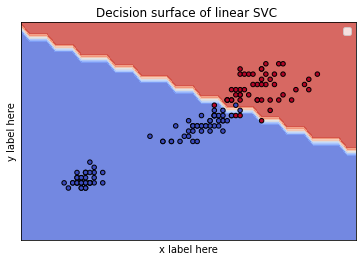

In [10]:
fig, ax = plt.subplots()
title = ('Decision surface of linear SVC ')
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax,svm_clf,xx,yy,cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0,X1,c=y,cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [11]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [12]:
X,y = make_moons(n_samples=100,noise=0.15)

In [13]:
X.shape,y.shape

((100, 2), (100,))

In [14]:
polynomial_svm_clf = Pipeline([("poly_features",PolynomialFeatures(degree=3)),
                              ('scaler',StandardScaler()),
                              ('svm_clf',LinearSVC(C=10,loss="hinge"))])

In [15]:
polynomial_svm_clf.fit(X,y)

D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [16]:
X0,X1 = X[:,0], X[:,1]

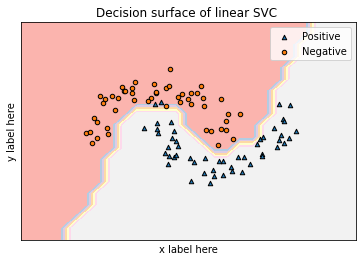

In [17]:
fig, ax = plt.subplots()
title = ('Decision surface of linear SVC ')
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax,polynomial_svm_clf,xx,yy,cmap=plt.cm.Pastel1,alpha=1)
pos = y==1
neg = y==0
ax.scatter(X0[pos],X1[pos],cmap=plt.cm.coolwarm,marker='^', s=20, edgecolors='k',label="Positive")
ax.scatter(X0[neg],X1[neg],cmap=plt.cm.coolwarm,marker='o', s=20, edgecolors='k',label="Negative")
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

#### Polynomial Kernel

In [18]:
from sklearn.svm import SVC

In [19]:
poly_kernel_svm_clf = Pipeline([("scaler",StandardScaler()),
                              ("svm_clf",SVC(kernel="poly",degree=10,coef0=100,C=5))])

In [20]:
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

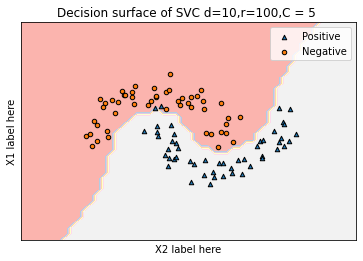

In [32]:
#Plotting Decision boundary
fig, ax = plt.subplots()
title = ('Decision surface of SVC d=10,r=100,C = 5 ')
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax,polynomial_svm_clf,xx,yy,cmap=plt.cm.Pastel1,alpha=1)
pos = y==1
neg = y==0
ax.scatter(X0[pos],X1[pos],cmap=plt.cm.coolwarm,marker='^', s=20, edgecolors='k',label="Positive")
ax.scatter(X0[neg],X1[neg],cmap=plt.cm.coolwarm,marker='o', s=20, edgecolors='k',label="Negative")
ax.set_ylabel('X1 label here')
ax.set_xlabel('X2 label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

#### Gaussian RBF Kernel

In [35]:
rbf_kernel_svm_clf = Pipeline([("scaler",StandardScaler()),
                              ("svm_clf",SVC(kernel="rbf",gamma=5,C=0.001))])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

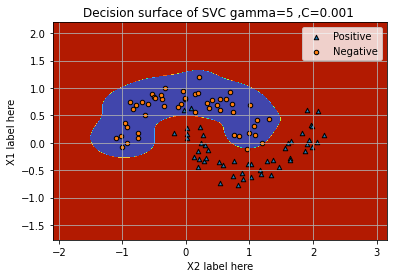

In [39]:
#Plotting Decision boundary
fig, ax = plt.subplots()
title = ('Decision surface of SVC gamma=5 ,C=0.001 ')
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax,rbf_kernel_svm_clf,xx,yy,cmap=plt.cm.turbo,alpha=1)
pos = y==1
neg = y==0
ax.scatter(X0[pos],X1[pos],cmap=plt.cm.coolwarm,marker='^', s=20, edgecolors='k',label="Positive")
ax.scatter(X0[neg],X1[neg],cmap=plt.cm.coolwarm,marker='o', s=20, edgecolors='k',label="Negative")
ax.grid(True)
ax.set_ylabel('X1 label here')
ax.set_xlabel('X2 label here')
#ax.set_xticks(())
#ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()